In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [43]:
def cañon_acierta_castillo():
   
    xo = 0
    yo = 0
    a=-9.8
    ro=[xo,yo]
    try:
        vo = float(input("Ingrese la magnitud de velocidad inicial del lanzamiento= "))
        angulo_elevacion = float(input ("Ingrese el ángulo de elevación del cañon= "))
        h = float(input("Ingrese altura del castillo= "))
        w = float(input("Ingrese anchura del castillo= "))
        assert(vo >= 0 and angulo_elevacion>=0 and h>=0 and w>=0)
    
    except AssertionError:
        print("Ha ingresado alguna magnitud negativa")
        print("Intentelo de nuevo ingresando valores correctamente")
        return(None)
    
    px = float(input("Ingrese la posición horizontal del centro de la base del Castillo= "))
    py = float(input ("Ingrese la posición vertical del centro de la base del Castillo= "))
    
    vxo = vo*math.cos(math.radians(angulo_elevacion))
    vyo = vo*math.sin(math.radians(angulo_elevacion))
    vector_vo = [vxo, vyo]
    
    x = lambda t:  xo+vxo*t
    y = lambda t: yo+vyo*t+a*0.5*t**2
    r = lambda t: [x(t),y(t)]
    
    duracion_lanzamiento=-2*vyo/a
    
    tiempo=0
    
    while (tiempo <= duracion_lanzamiento):
        if(px-w/2<=x(tiempo)<=px+w/2 and y(tiempo)<=py+h):
            print("El proyectil impacta en el Castillo")
            break
        else:
            tiempo=tiempo+1/16
    if tiempo >= duracion_lanzamiento:
        print("Proyectil no impacta en el Castillo")
    else:
        print("Los datos del lanzamiento son:")       
        print(f"La posición incial del cañon es= {ro} m")
        print(f"Las componentes de velocidad inicial del proyectil= {vector_vo} m/s")
        print(f"El ángulo de elevación del cañon es {angulo_elevacion} grados")
        print(f"El tiempo que tarda en impactar es= {tiempo} con un tiempo de duración del lanzamiento de {duracion_lanzamiento}")
        
    t=np.arange(0,tiempo,1/16)
    rx=list(x(t))
    ry=list(y(t))
    
    ancho_del_castillo = [px-w/2,px+w/2]
    sup_castillo = [h+py for l in [px-w/2,px+w/2]]
    base_castillo = [py for l in [px-w/2,px+w/2]]
    
    dominio=[0]
    dominio.extend(ancho_del_castillo)
    if x(duracion_lanzamiento)>=px+w/2:
        dominio.append(x(duracion_lanzamiento))
    else:
        dominio.append(px+w)
    
    terreno=[0]
    terreno.extend(base_castillo)
    terreno.append(0)
    
    rango_altura = [py,h+py]
    pared_izquierda = [(px-w/2) for l in [py,h+py]]
    pared_derecha = [(px+w/2) for l in [py,h+py]]

    plt.plot(rx, ry,color='r')
    plt.title("Trayectoria del proyectil")
    plt.xlabel("Recorrido horizontal (m)")
    plt.ylabel("Altura (m)")
    plt.plot(ancho_del_castillo, sup_castillo, color='b')
    plt.plot(dominio, terreno, color='g')
    plt.plot(pared_izquierda, rango_altura,color='b')
    plt.plot(pared_derecha, rango_altura,color='b')
    plt.show()


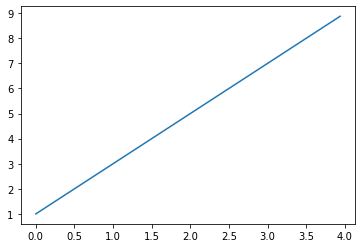

[0, 4.5, 7.5, 0]

In [37]:
j=np.arange(0,4,1/16)
u = lambda p: 1+2*p
ru=list(u(j))
plt.plot(j, ru)
plt.show()
bases = [6.5-4/2,6.5+2/2]
castillo=[1*base/base for base in [6.5-4/2,6.5+2/2]]
terreno=[0]
terreno.extend(bases)
terreno.append(0)
terreno


Ingrese la magnitud de velocidad inicial del lanzamiento= 15
Ingrese el ángulo de elevación del cañon= 150
Ingrese altura del castillo= 3
Ingrese anchura del castillo= 7
Ingrese la posición horizontal del centro de la base del Castillo= -10
Ingrese la posición vertical del centro de la base del Castillo= 1
El proyectil impacta en el Castillo
Los datos del lanzamiento son:
La posición incial del cañon es= [0, 0] m
Las componentes de velocidad inicial del proyectil= [-12.99038105676658, 7.499999999999999] m/s
El ángulo de elevación del cañon es 150.0 grados
El tiempo que tarda en impactar es= 0.5625 con un tiempo de duración del lanzamiento de 1.5306122448979589


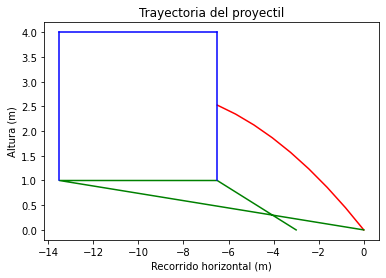

In [49]:
cañon_acierta_castillo()